### EDA 02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from config import data_setting, predict_setting
from dataFactory import Read_DataList, CIC_Dataset

##### 1. 데이터 불러오기

In [2]:
# set data path & level 
filePath = data_setting["filePath"]
level = 1 # data_setting["level"]
scale = data_setting["scale"]
val_size = data_setting["val_size"]
pred_filePath = predict_setting["pred_filePath"]

# set train with dataset
num_workers = data_setting["num_workers"]
batch_size = data_setting["batch_size"]
drop_last = data_setting["drop_last"]
shuffle_flag = data_setting["shuffle_flag"]       
add_test = True

dataloader = Read_DataList(filePath, val_size, level, scale, add_test)


 - [ Start Read Data-List And Load Data-files ] - 

Now Loading........TCP_IP-DoS-SYN1_train.pcap.csv...Check.left/Total_file..(51/51)
Skip:..Recon-OS_Scan_train.pcap.csv..is..in...the..List..of..skip..Category..Class...(50/51)
Now Loading........TCP_IP-DDoS-UDP8_train.pcap.csv...Check.left/Total_file..(49/51)
Now Loading........TCP_IP-DoS-ICMP4_train.pcap.csv...Check.left/Total_file..(48/51)
Now Loading........TCP_IP-DDoS-SYN4_train.pcap.csv...Check.left/Total_file..(47/51)
Now Loading........TCP_IP-DDoS-ICMP1_train.pcap.csv...Check.left/Total_file..(46/51)
Now Loading........TCP_IP-DoS-TCP3_train.pcap.csv...Check.left/Total_file..(45/51)
Now Loading........MQTT-DDoS-Connect_Flood_train.pcap.csv...Check.left/Total_file..(44/51)
Skip:..Recon-VulScan_train.pcap.csv..is..in...the..List..of..skip..Category..Class...(43/51)
Now Loading........TCP_IP-DDoS-ICMP8_train.pcap.csv...Check.left/Total_file..(42/51)
Now Loading........TCP_IP-DDoS-TCP4_train.pcap.csv...Check.left/Total_file..(41/51

In [11]:
# 데이터를 읽어 들이고 데이터의 모양을 확인 (클라스로 부터 데이터 불러오기)
train,train_label = dataloader.get_train_data()
val, val_label = dataloader.get_val_data()
test, test_label = dataloader.get_test_data()
print (f"train input shape: {train.shape} \ntrain_label shape: {train_label.shape}\n")
print (f"val input shape: {val.shape} \nval_label shape: {val_label.shape}\n")
print (f"test input shape: {test.shape} \ntest_label shape: {test_label.shape}\n \n")

oneHot = dataloader.get_oneHot()   # 학습된 원핫 인코더 불러오기 
print(f"label_oneHot_categories: {oneHot.categories_}")

colnames = dataloader.colnames
# colnames = colnames.remove('class_1')
print(f"feature column name's: {colnames}")
print(f"fueature columns length: {len(colnames)}")

train input shape: (5628742, 45) 
train_label shape: (5628742, 3)

val input shape: (1407186, 45) 
val_label shape: (1407186, 3)

test input shape: (1583015, 45) 
test_label shape: (1583015, 3)
 

label_oneHot_categories: [array(['Benign', 'DDoS', 'DoS'], dtype=object)]
feature column name's: ['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'class_1']
fueature columns length: 46


##### 2. 데이터 리샘프링

In [4]:
# trasform to DataFrame
df_train_label = pd.DataFrame(train_label, columns=[oneHot.categories_[0]])
df_val_label = pd.DataFrame(val_label, columns=[oneHot.categories_[0]])
df_test_label = pd.DataFrame(test_label, columns=[oneHot.categories_[0]])

# label count plot : 라벨 데이터의 클라스별 비율 확인 
def plot_column_sums(df, flag:str):
    column_sums = df.sum()
    print(f"{flag.upper} columns count : \n{column_sums}")
    plt.figure(figsize=(10, 6))
    column_sums.plot(kind='bar')
    plt.title(f'Sum of {flag.upper()}\'s Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc=1)
    plt.show()

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

rus = RandomUnderSampler(sampling_strategy='auto', random_state = 21)
val_rus, val_label_rus = rus.fit_resample(val, val_label)

df_val_rus = pd.DataFrame(val_rus)
df_val_label_rus = pd.DataFrame(val_label_rus)
df_val_rus.to_csv('./data/CIC_2024/balanced/df_val_rus.csv', index=False)
df_val_label_rus.to_csv('./data/CIC_2024/balanced/df_val_label_rus.csv', index=False)


##### 3. 군집분석 및 차원축소 

In [ ]:
# train = './data/CIC_2024/balanced/df_train_rus.csv'
# train_label = './data/CIC_2024/balanced/df_train_label_rus.csv'

val = './data/CIC_2024/balanced/df_val_rus.csv'
val_label = './data/CIC_2024/balanced/df_val_label_rus.csv'

# df_test = './data/CIC_2024/balanced/df_test_rus.csv'
# df_train = pd.read_csv(train)
df_val = pd.read_csv(val)

scaler = StandardScaler()

df_val_scaled = scaler.fit_transform(df_val)
print(f"{df_val_scaled.shape}")

df_val_label = pd.read_csv(val_label)
df_val_label.head()
print(f"{df_val_label.shape}")
df_val_rvs = oneHot.inverse_transform(df_val_label)
df_val_rvs = pd.DataFrame(df_val_rvs, columns=['class'])
df_val_rvs['class'] = df_val_rvs['class'].astype('category')

(115644, 45)


<built-in method upper of str object at 0x7ef6096fcc20> columns count : 
0    38548
1    38548
2    38548
dtype: int64


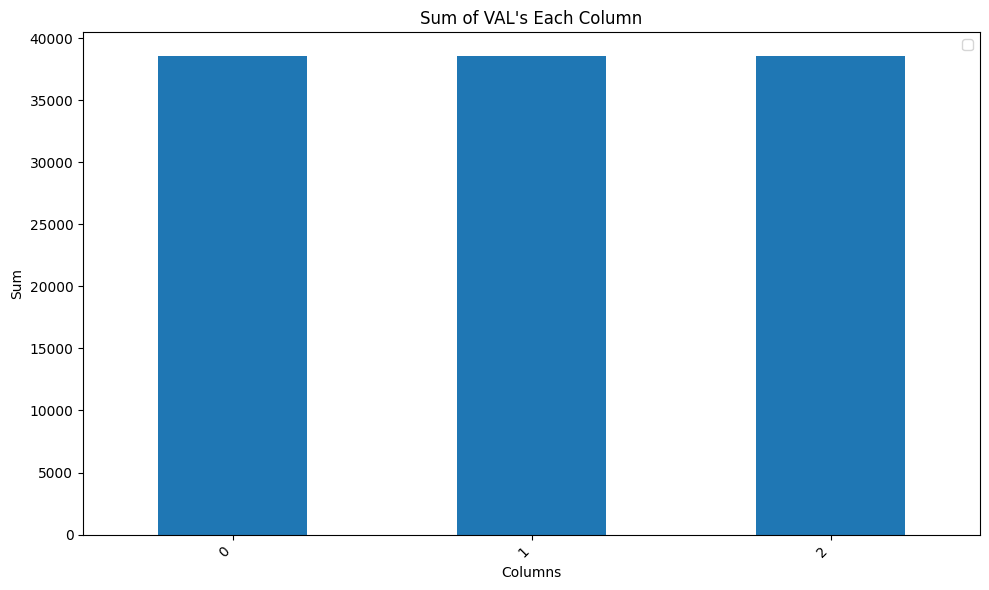

In [14]:
plot_column_sums(df_val_label, 'val')

##### 4. T-sne 차원감소

In [4]:
perplexity = 30.
n_iter = 300
n_components_3d = 3
tsne_3d = TSNE(n_components=n_components_3d, perplexity=perplexity, n_iter=n_iter, random_state=42)
val_embedded = tsne_3d.fit_transform(df_val_scaled)


t-SNE 3차원 임베딩 후 데이터 형태: (115644, 3)


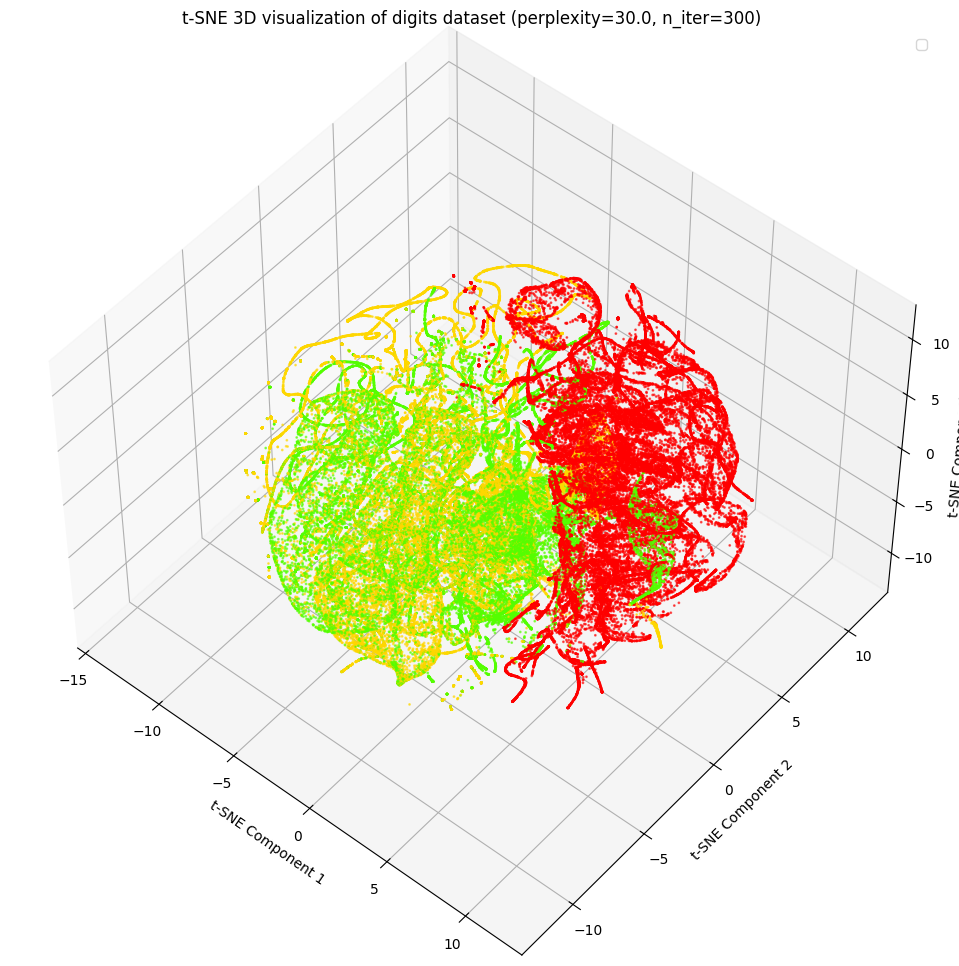

In [19]:
print("\nt-SNE 3차원 임베딩 후 데이터 형태:", val_embedded.shape)

# 5. t-SNE 결과 시각화 (3차원으로 임베딩했을 경우)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(val_embedded[:, 0], val_embedded[:, 1], val_embedded[:, 2], c=df_val_rvs['class'].cat.codes, cmap='prism', s=1, alpha=0.6)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title(f't-SNE 3D visualization of digits dataset (perplexity={perplexity}, n_iter={n_iter})')
# fig.colorbar(scatter, label='Digit')
ax.view_init(elev=50, azim=-50, roll=0)
ax.legend()
plt.show()

##### PCA

In [20]:
pca = PCA(n_components=3)
pca.fit(df_val_scaled)

PCA(n_components=3)

In [21]:
# 3. 주성분 분석 결과 확인
print("고유값 (설명된 분산):", pca.explained_variance_)
print("설명된 분산 비율:", pca.explained_variance_ratio_)
print("주성분 (고유 벡터):")
for i, component in enumerate(pca.components_):
    print(f"  주성분 {i+1}: {component}")

고유값 (설명된 분산): [7.85361146 4.15752188 3.20522833]
설명된 분산 비율: [0.17848963 0.09448832 0.07284547]
주성분 (고유 벡터):
  주성분 1: [ 2.33817850e-01 -2.61889876e-02  5.16061796e-02 -7.32900709e-02
 -7.32900709e-02 -4.33680869e-19  1.77075547e-02 -4.12325776e-02
 -1.24727381e-02  1.53317760e-01  2.10343128e-01  2.46324161e-04
  1.97788319e-04  2.56656852e-02  2.30143917e-02  3.41207179e-02
  1.59146326e-01  1.44962211e-01  1.94331575e-01  3.09689573e-02
 -3.40478901e-03 -3.43701436e-03 -1.93752569e-03 -3.42831338e-03
  1.38178211e-01 -7.18814849e-02  3.61458457e-04  1.22330130e-02
 -9.84032984e-02  2.43325925e-03 -1.22330130e-02 -1.22330130e-02
  2.89147792e-01  2.49937938e-01  3.31436972e-01  3.07809605e-01
  2.32555270e-01  3.03671416e-01  4.00967841e-02  3.98790219e-02
  3.32676851e-01  2.32384562e-01  2.09580479e-01  1.70591023e-01
  3.98908967e-02]
  주성분 2: [-1.37094245e-01 -2.21844721e-01  3.74377364e-02 -2.12214913e-01
 -2.12214913e-01 -0.00000000e+00  8.93243468e-02  5.87947365e-02
  6.9274340

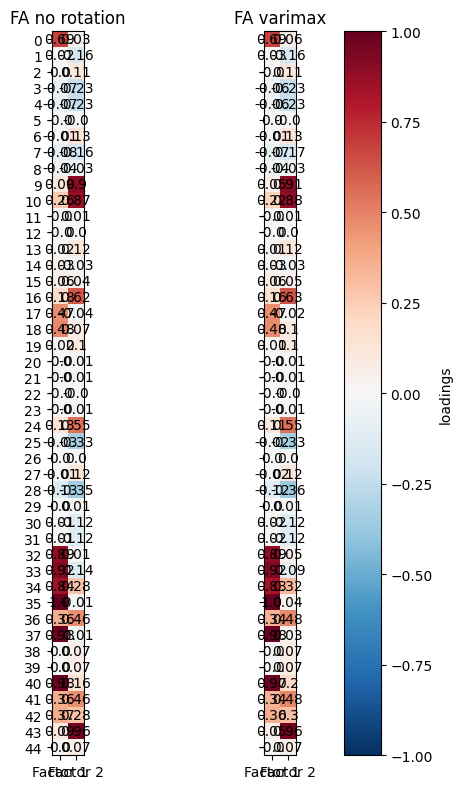

In [21]:
X = StandardScaler().fit_transform(df_val)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df_val.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df_val.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

In [20]:

# Apply Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_val_scaled)
print(f'Chi-square value: {chi_square_value}\nP-value: {p_value}')

# Apply KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_val_scaled)
print(f'KMO Model: {kmo_model}')

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df_val_scaled)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df_val_scaled.shape[1]+1), eigen_values)
plt.plot(range(1, df_val_scaled.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Chi-square value: nan
P-value: nan
KMO Model: nan


ValueError: array must not contain infs or NaNs